## Loading the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\india\Downloads\marketing_campaign.csv", sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df.describe(include=object)

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


## Data Cleaning

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df['Year_Birth'] = df['Year_Birth'].astype('int')
# Lets find age of each customer
from datetime import datetime
df['Age'] = 2020 - df['Year_Birth']

In [9]:
df = df[df['Age'] < 90 ]
df = df[df['Income'] < 200000]

In [10]:
income_mean = df['Income'].mean()

In [11]:
df['Income'].median()

51371.0

In [12]:
df['Income'].replace(np.nan, income_mean, inplace=True)

* Income feature is null so it has been replaced with its mean value
* There are no duplicate values in the dataset

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [14]:
df['total_days'] = (datetime.now() - df['Dt_Customer']).dt.days

In [15]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df.drop(columns=['Kidhome', 'Teenhome'], inplace=True)
df['Total_spent'] = df['MntWines']+ df['MntFruits'] + df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.drop(columns = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)
df['Prod_purchases'] = df['NumStorePurchases'] + df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases']
df.drop(columns=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases'], inplace=True)
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2',], inplace=True)

In [16]:
df['Marital_Status'] = df['Marital_Status'].replace(['Widow', 'Alone', 'Absurd','YOLO','Divorced'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Together', 'Married')

In [17]:
df.drop(columns= ['ID', 'Year_Birth','Z_CostContact', 'Z_Revenue','Recency','Complain','Response', 'NumWebVisitsMonth', 'AcceptedCmp', 'Dt_Customer'], axis = 1, inplace=True)

In [18]:
df['total_days']

0       4329
1       3779
2       3978
3       3805
4       3827
        ... 
2235    4047
2236    3685
2237    3821
2238    3822
2239    4288
Name: total_days, Length: 2212, dtype: int64

<Axes: xlabel='Education'>

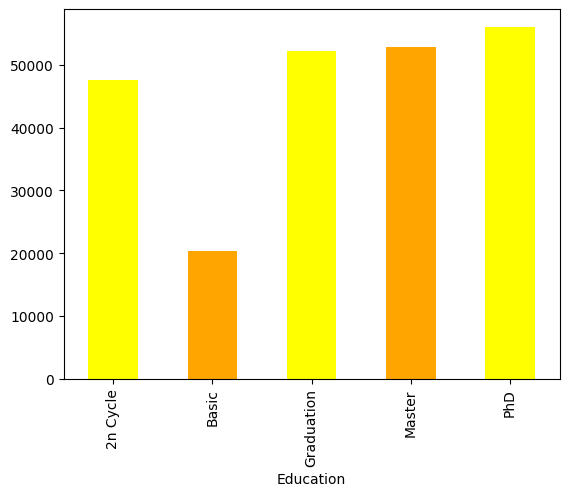

In [19]:
df.groupby('Education')['Income'].mean().plot(kind = 'bar', color = ['yellow', 'orange'])

In [20]:
data = df.corr(numeric_only=True)

<Axes: >

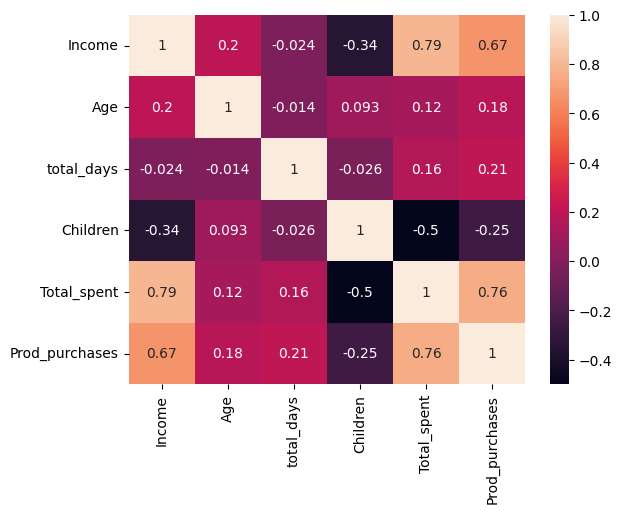

In [21]:
sns.heatmap(data, annot=True)

<Axes: xlabel='Prod_purchases', ylabel='Total_spent'>

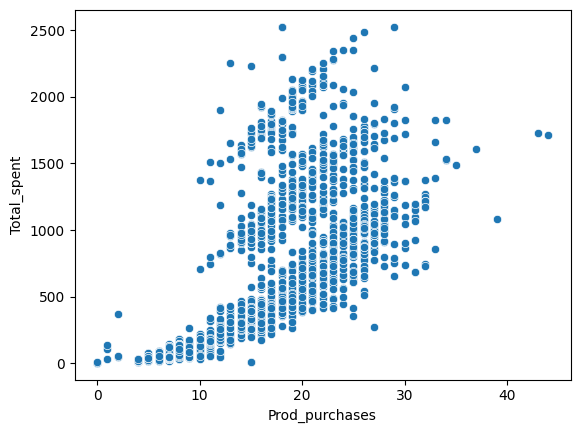

In [22]:
sns.scatterplot(df, x = df['Prod_purchases'],y =  df['Total_spent'])

<Axes: xlabel='Prod_purchases', ylabel='Income'>

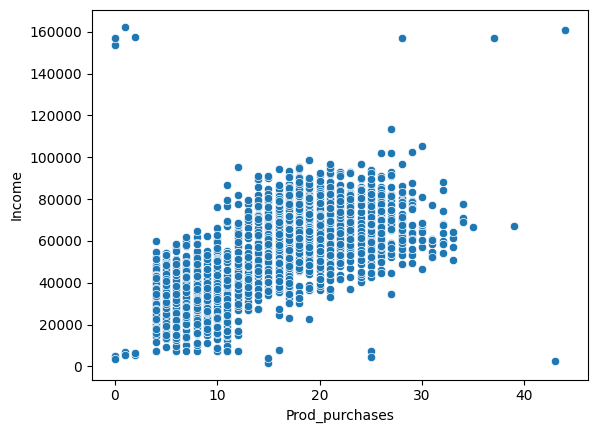

In [23]:
sns.scatterplot(df, x = df['Prod_purchases'],y =  df['Income'])

<Axes: xlabel='Income', ylabel='Total_spent'>

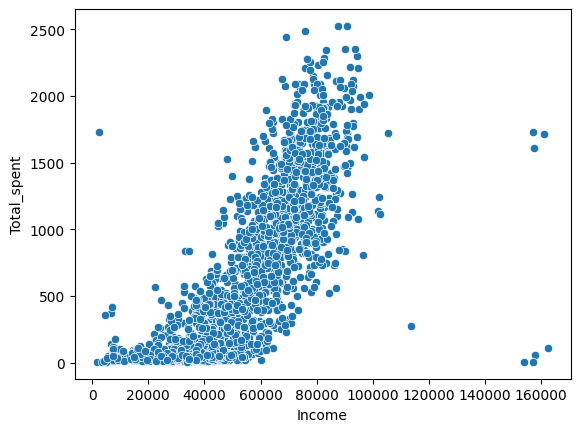

In [24]:
sns.scatterplot(df, x = df['Income'] ,y =  df['Total_spent'])

In [25]:
df['Education'] = df['Education'].replace(['PhD', 'Master','2n Cycle'], 'Post Graduation')
df['Education'] = df['Education'].replace('Basic', 'Graduation')

In [26]:
cat = df.select_dtypes(include='object')

In [27]:
le = LabelEncoder()

In [28]:
df["Education"] = le.fit_transform(cat['Education'])

In [29]:
df['Marital_Status'] = le.fit_transform(cat['Marital_Status'])

In [30]:
df

,Education,Marital_Status,Income,Age,total_days,Children,Total_spent,Prod_purchases
0,0,1,58138.0,63,4329,0,1617,25
1,0,1,46344.0,66,3779,2,27,6
2,0,0,71613.0,55,3978,0,776,21
3,0,0,26646.0,36,3805,1,53,8
4,1,0,58293.0,39,3827,1,422,19
...,...,...,...,...,...,...,...,...
2235,0,0,61223.0,53,4047,1,1341,18
2236,1,0,64014.0,74,3685,3,444,22
2237,0,1,56981.0,39,3821,0,1241,19
2238,1,0,69245.0,64,3822,1,843,23


In [31]:
std = StandardScaler()

In [32]:
d =std.fit_transform(df)

In [33]:
X = pd.DataFrame(d, columns=df.columns)

In [34]:
X = X.drop(columns = ['Education','Marital_Status', 'Age','total_days','Children', 'Prod_purchases'], axis=1)

In [35]:
x = X.values

In [36]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters= i,init='k-means++', random_state=22)
    kmean.fit(x)
    wcss.append(kmean.inertia_)

In [37]:
wcss

[4423.9999999999945,
 1407.9295406805124,
 924.7718769758621,
 671.2607629941915,
 564.3278891262871,
 485.4450462732722,
 392.51036600511986,
 341.31127322776274,
 311.1887542858683,
 274.7942634175782]

<Axes: >

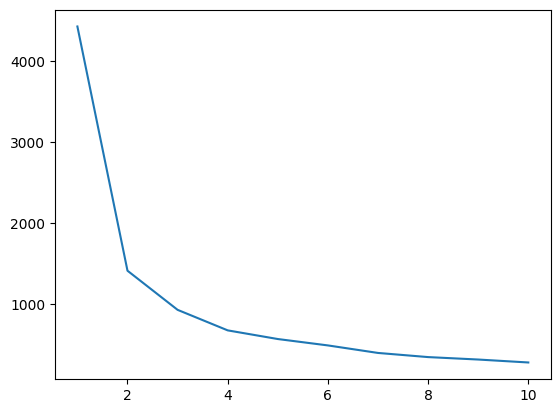

In [38]:
sns.lineplot(x = range(1,11), y = wcss)

In [55]:
kmeans = KMeans(n_clusters= 4,init='k-means++', random_state=22)
y = kmeans.fit_predict(x)

In [56]:
kmeans.cluster_centers_

array([[-0.13105593, -0.52706468],
       [ 1.29881695,  1.752633  ],
       [-1.13498398, -0.88097106],
       [ 0.73179316,  0.57432157]])

In [57]:
x.shape

(2212, 2)

In [58]:
y.shape

(2212,)

Text(0, 0.5, 'Customer spent')

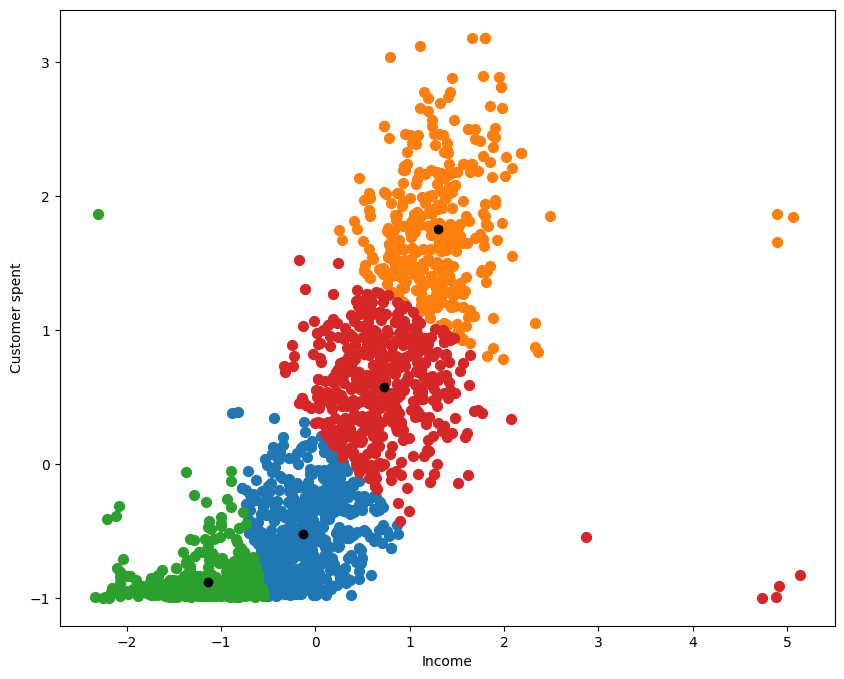

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(x[y==0,0], x[y ==0,1], s = 50, label= "cluster 1" )
plt.scatter(x[y==1,0], x[y ==1,1], s = 50,   label= "cluster 2" )
plt.scatter(x[y==2,0], x[y ==2,1], s = 50,  label= "cluster 3" )
plt.scatter(x[y==3,0], x[y ==3,1], s = 50,  label= "cluster 4" )
plt.scatter(x[y==4,0], x[y ==4,1], s = 50,  label= "cluster 5" )

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'black')
plt.xlabel('Income')
plt.ylabel('Customer spent')

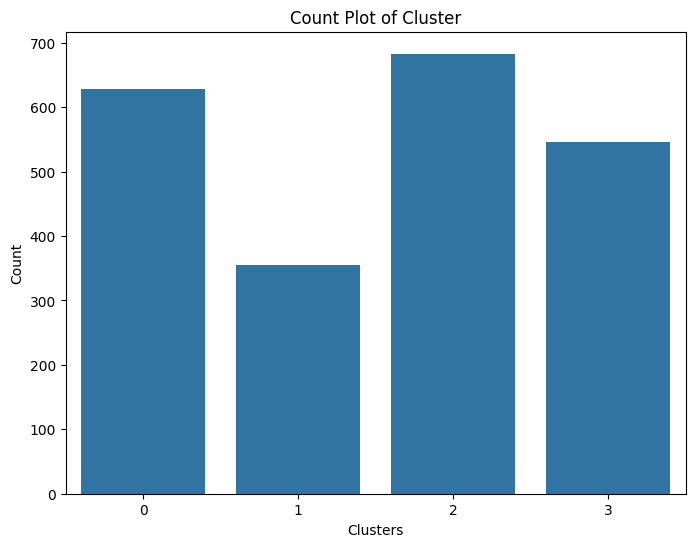

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Count Plot of Cluster')
plt.show()

In [64]:
y

array([1, 0, 3, ..., 3, 3, 0])